 softmax函数，返回n个分量概率的向量，向量之和为1

In [1]:
import numpy as np

In [5]:
import pandas as pd
data = pd.read_csv('C:\\Users\\chen jia ni\\Desktop\\iris.data.csv',names = ['e_cd','e_kd','b_cd','b_kd','cat'])

In [10]:
data.head()

,e_cd,e_kd,b_cd,b_kd,cat
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


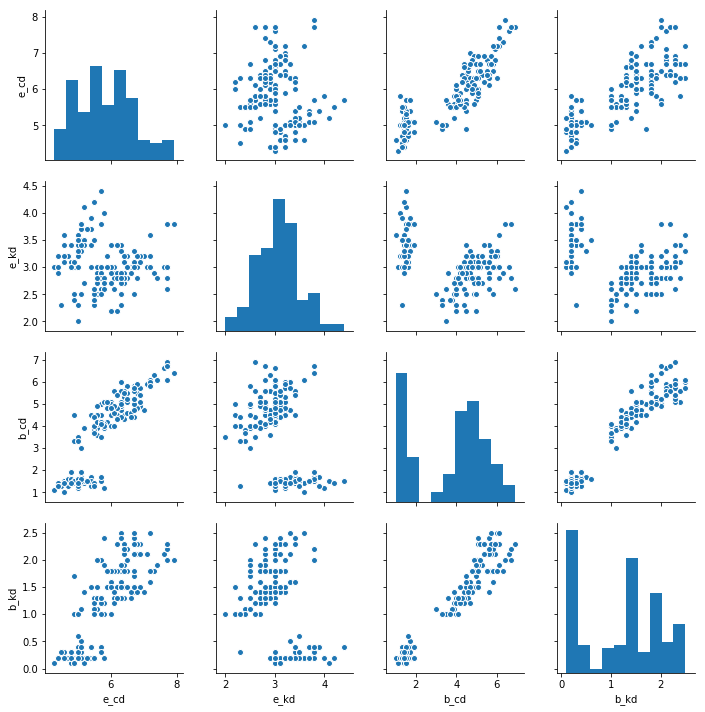

In [11]:
import seaborn as sns
%matplotlib inline
sns.pairplot(data)#所有特征的关系

In [12]:
data.cat.unique()#花的种类

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
data['c1'] = np.array(data['cat'] == 'Iris-setosa').astype(np.float32)
data['c2'] = np.array(data['cat'] == 'Iris-versicolor').astype(np.float32)
data['c3'] = np.array(data['cat'] == 'Iris-virginica').astype(np.float32)

In [16]:
target = np.stack([data.c1.values,data.c2.values,data.c3.values]).T

In [28]:
target.shape

(150, 3)

In [29]:
shuju = np.stack([data.e_cd.values,data.e_kd.values,data.b_cd.values,data.b_kd.values]).T

In [30]:
np.shape(shuju)

(150, 4)

## 定义网络

In [31]:
import tensorflow as tf

In [32]:
x = tf.placeholder("float",shape=[None,4])
y = tf.placeholder("float",shape=[None,3])

In [33]:
weight = tf.Variable(tf.truncated_normal([4,3]))#与X的4列相关
bias = tf.Variable(tf.truncated_normal([3]))#与y的输出有关3种
combine_input = tf.matmul(x,weight)+bias#矩阵相乘

## 预测

In [36]:
pred = tf.nn.softmax(combine_input)#预测N个分量向量

In [38]:
y.get_shape(),combine_input.get_shape()#都是3列

(TensorShape([Dimension(None), Dimension(3)]),
 TensorShape([Dimension(None), Dimension(3)]))

## 损失函数

交叉熵

In [40]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=combine_input))

求正确率

In [42]:
correct_pred = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))#取最大值的索引，010即2，100即1
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

训练

## 高级的梯度下降，优化，能控制幅度AdamOptimizer

In [43]:
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)

In [44]:
sess = tf.Session()#初始会话

In [45]:
sess.run(tf.global_variables_initializer())#初始变量

## 迭代运算

In [46]:
for i in range(10000):
    index = np.random.permutation(len(target))#乱序
    shuju = shuju[index]
    target = target[index]
    sess.run(train_step,feed_dict={x:shuju,y:target})#传给train_step
    if i%1000 == 0:
        print(sess.run((loss,accuracy),feed_dict={x:shuju,y:target}))#打印loss,acurracy
    

(5.0197492, 0.33333334)
(0.85274041, 0.52666664)
(0.53397018, 0.89333332)
(0.43511933, 0.94)
(0.37206718, 0.95999998)
(0.31466877, 0.96666664)
(0.26140359, 0.97333336)
(0.21483205, 0.96666664)
(0.17635974, 0.97333336)
(0.14586422, 0.97333336)
